# Scalar Fields: normals

In this notebook we are going to learn about the avaliable scalar fields that require the normals of each point.

# Imports

In [1]:
from pyntcloud import PyntCloud

---

# Setup

We are going to **load** a 3D model of an ankylosaurus from the provided `examples/data.`

You could load other point cloud in any of the supported [point cloud formats](http://pyntcloud.readthedocs.io/en/latest/io.html).

You can learn more about reading and writing point clouds in the `examples/[io]` notebooks.

In [2]:
anky = PyntCloud.from_file("data/ankylosaurus_mesh.ply")
anky

PyntCloud
34820 points with 6 scalar fields
69636 faces in mesh
0 kdtrees
0 voxelgrids
Centroid: 0.029972486197948456, 1.1250594854354858, 2.887650489807129
Other attributes:

From the description, we can see that this is a 3D mesh with 69636 faces. 

We can visualize the mesh as follows:

In [ ]:
anky.plot(mesh=True)

![mesh](data/images/structures-voxelgrid-1.png)

And convert it to a point cloud by sampling 100.000 random points from the surface.

You cand learn more about hoy to convert a triangular mesh into a point cloud in the `examples/[sampling]` notebooks.

In [3]:
anky_cloud = anky.get_sample("mesh_random", n=100000, rgb=True, normals=True, as_PyntCloud=True)

Note that we pass the `normals=True` argument so now our point cloud has normal values for each point:

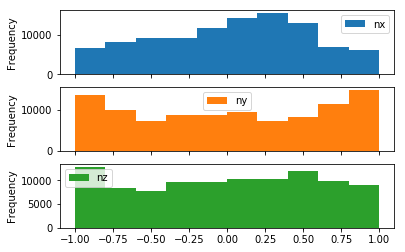

In [4]:
anky_cloud.points[["nx", "ny", "nz"]].plot(kind="hist", subplots=True);

We can visualize the new point cloud:

In [ ]:
anky_cloud.plot()

![anky_cloud](data/images/structures-voxelgrid-2.png)

---

# Inclination (Degrees)

$\Huge I_d = \arccos (N_z) \times \frac{180}\pi{}$

In [5]:
inclination_degrees = anky_cloud.add_scalar_field("inclination_degrees")

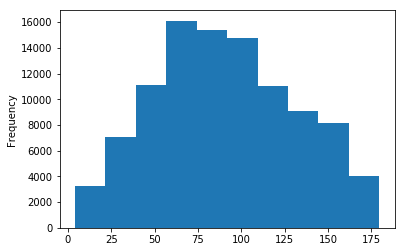

In [6]:
anky_cloud.points[inclination_degrees].plot(kind="hist");

In [ ]:
anky_cloud.plot(use_as_color=inclination_degrees, cmap="jet")

![inclination_degrees](data/images/scalar_fields-normals-1.png)

---

# Inclination (Radians)

$\Huge I_r = \arccos (N_z)$

In [7]:
inclination_radians = anky_cloud.add_scalar_field("inclination_radians")

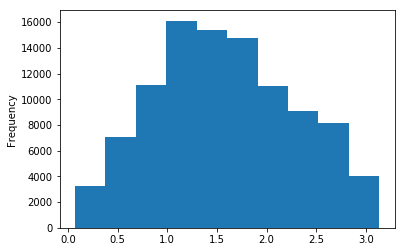

In [8]:
anky_cloud.points[inclination_radians].plot(kind="hist");

In [ ]:
anky_cloud.plot(use_as_color=inclination_radians, cmap="jet")

![inclination_radians](data/images/scalar_fields-normals-2.png)

---

# Orientation (Degrees)

$\Huge O_d = \arctan (N_x, N_y) \times \frac{180}\pi{}$

In [9]:
orientation_degrees = anky_cloud.add_scalar_field("orientation_degrees")

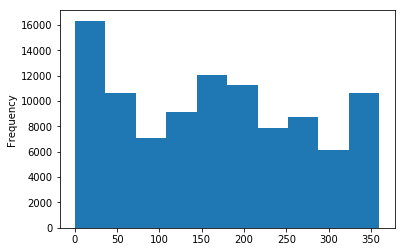

In [10]:
anky_cloud.points[orientation_degrees].plot(kind="hist");

In [ ]:
anky_cloud.plot(use_as_color=orientation_degrees, cmap="jet")

![orientation_degrees](data/images/scalar_fields-normals-3.png)

---

# Orientation (radians)

$\Huge O_r = \arctan (N_x, N_y)$

In [11]:
orientation_radians = anky_cloud.add_scalar_field("orientation_radians")

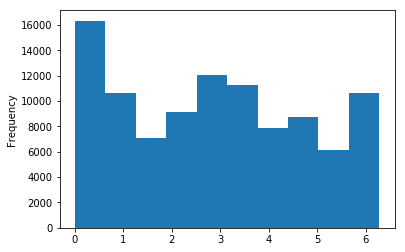

In [12]:
anky_cloud.points[orientation_radians].plot(kind="hist");

In [ ]:
anky_cloud.plot(use_as_color=orientation_radians, cmap="jet")

![orientation_radians](data/images/scalar_fields-normals-4.png)